In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('consumo_cerveja.csv', sep =',' , decimal = ',')

In [3]:
dados.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    object 
dtypes: float64(5), object(2)
memory usage: 51.6+ KB


In [9]:
dados = dados.dropna()

 - Convertendo a coluna Consumo de cerveja(litros) para float

In [10]:
dados['Consumo de cerveja (litros)'] = dados['Consumo de cerveja (litros)'].astype(str)
dados['Consumo de cerveja (litros)'] = dados['Consumo de cerveja (litros)'].str.replace('.', '')
dados['Consumo de cerveja (litros)'] = dados['Consumo de cerveja (litros)'].astype(float)

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.8+ KB


 - Renomeando as colunas 

In [12]:
lista_cols = ['data','temp_media','temp_min','temp_max','precipitacao','final_de_semana','consumo']

In [13]:
dados.columns = lista_cols

In [14]:
dados.head()

,data,temp_media,temp_min,temp_max,precipitacao,final_de_semana,consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461.0
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972.0
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814.0
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799.0
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900.0


 - Explorando os dados

In [15]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
temp_media,365.0,21.226356,3.180108,12.9,19.02,21.38,23.28,28.86
temp_min,365.0,17.461370,2.826185,10.6,15.30,17.90,19.60,24.50
temp_max,365.0,26.611507,4.317366,14.5,23.80,26.90,29.40,36.50
precipitacao,365.0,5.196712,12.417844,0.0,0.00,0.00,3.20,94.80
final_de_semana,365.0,0.284932,0.452001,0.0,0.00,0.00,1.00,1.00
consumo,365.0,25401.367123,4399.142703,14343.0,22008.00,24867.00,28631.00,37937.00


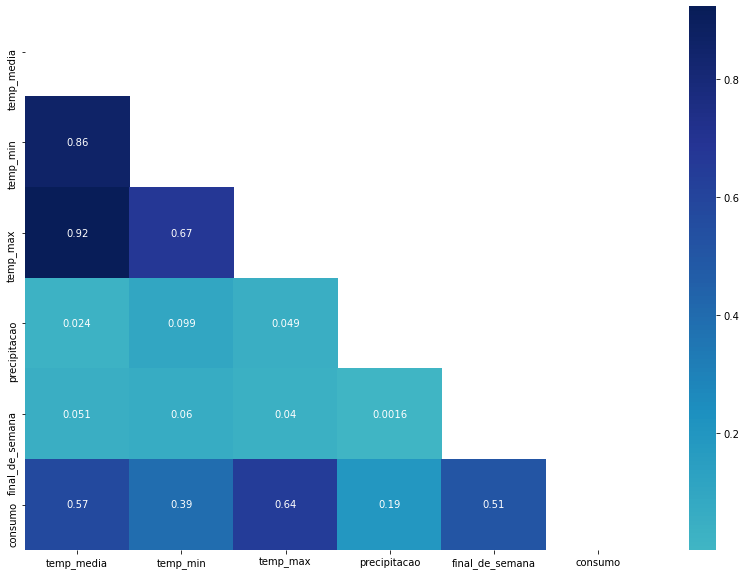

In [16]:
plt.figure(figsize=(14,10))

corr = dados.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

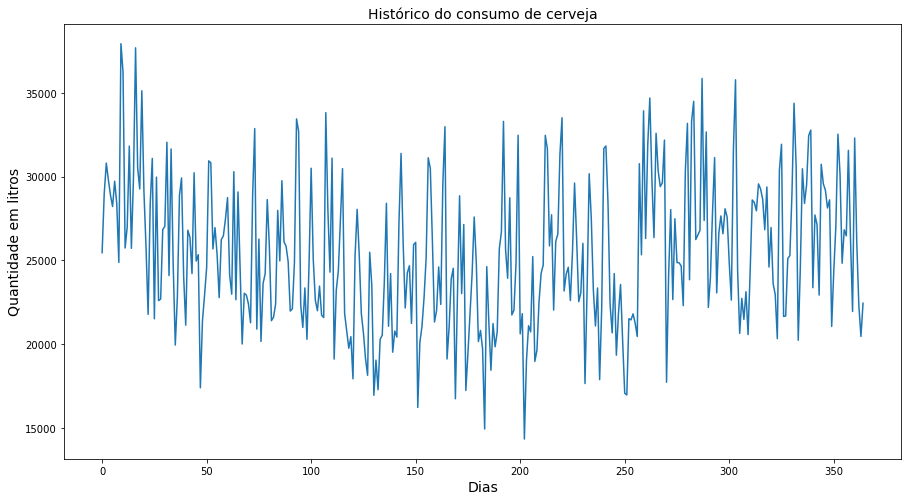

In [17]:
fig , ax = plt.subplots(figsize=(15,8))

ax.set_title('Histórico do consumo de cerveja', fontsize=14)
ax.set_xlabel('Dias', fontsize=14)
ax.set_ylabel('Quantidade em litros', fontsize=14)
ax = dados.consumo.plot()

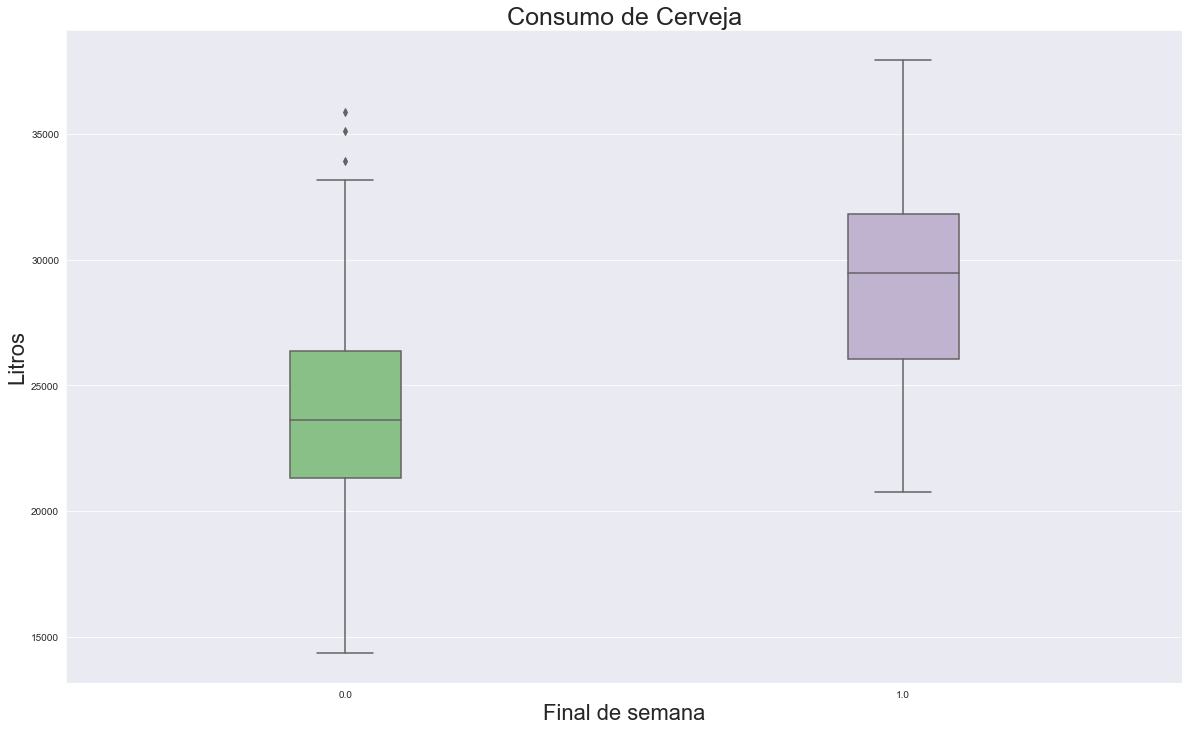

In [18]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.boxplot(x='final_de_semana', y='consumo', data=dados, orient='v', width=0.2)
ax.figure.set_size_inches(20, 12)
ax.set_title('Consumo de Cerveja', fontsize=25)
ax.set_ylabel('Litros', fontsize=22)
ax.set_xlabel('Final de semana', fontsize=22)
ax

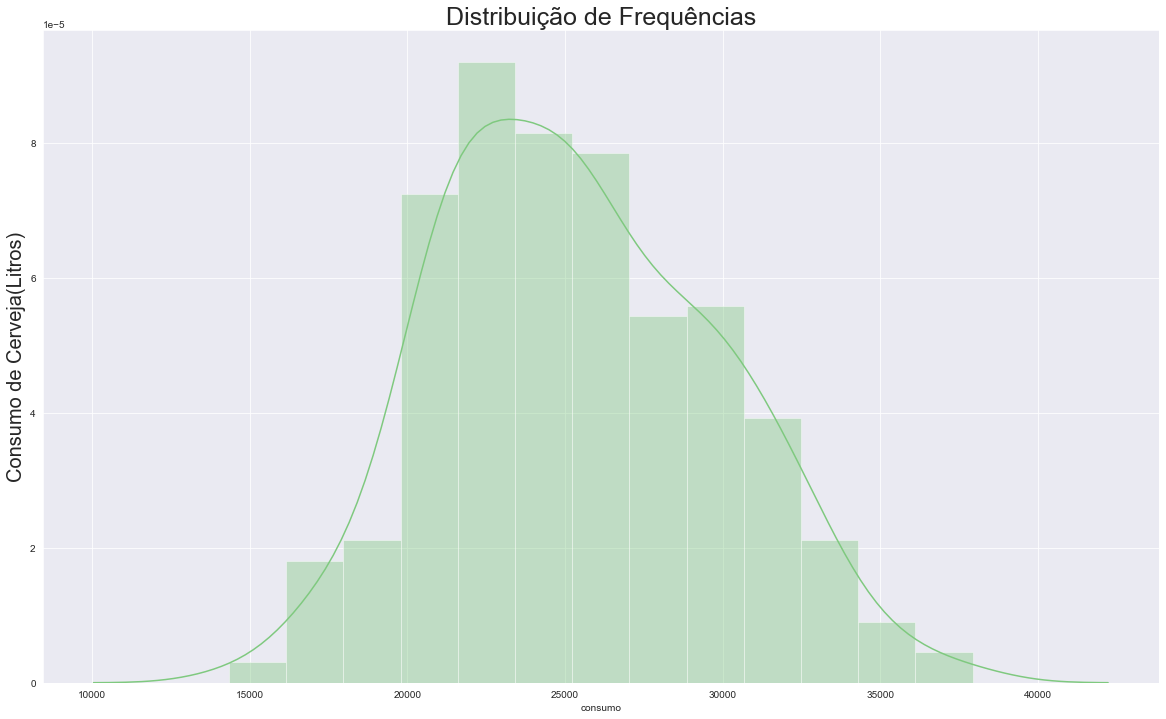

In [19]:
ax = sns.distplot(dados.consumo)
ax.figure.set_size_inches(20, 12)
ax.set_title('Distribuição de Frequências', fontsize=25)
ax.set_ylabel('Consumo de Cerveja(Litros)', fontsize=20)
ax

Text(0.5, 1.15, 'Dispersão entre as variáveis')

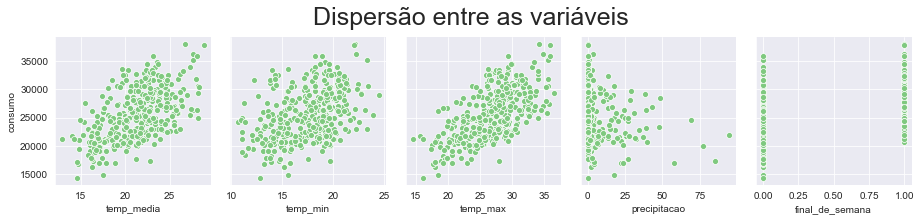

In [20]:
ax = sns.pairplot(data=dados,y_vars = 'consumo', x_vars = ['temp_media','temp_min','temp_max','precipitacao','final_de_semana'])
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=25 ,y=1.15)

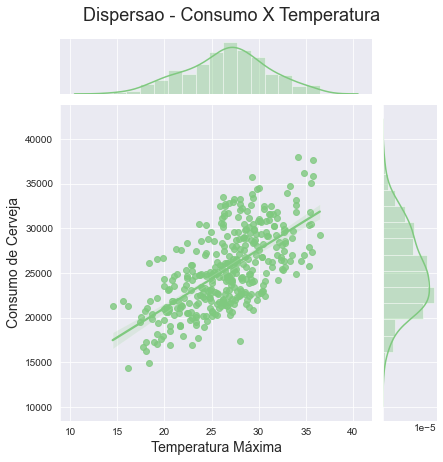

In [21]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados, kind = 'reg')
ax.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax

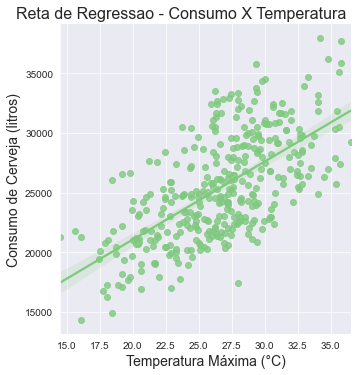

In [22]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

# Modelagem

 - Separando as variáveis em X e Y

In [23]:
X = dados[['temp_max','precipitacao','final_de_semana']]
Y = dados['consumo']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.3,random_state=0)

 - Modelo Baseline

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_treino, Y_treino)

LinearRegression()

 - Calculando o R²

In [42]:
lr.score(X_teste, Y_teste)

0.6566618325632168

In [39]:
Y_pred = lr.predict(X_teste)

In [40]:
from sklearn.metrics import r2_score
r2_score(Y_teste, Y_pred)

0.6566618325632168